# Titanic Survied Predication Using Logestic Regression

In [1]:
#import lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Extraction

In [2]:
#read data

df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/titanic.csv")
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [3]:
# dataset length

len(df)

1309

In [4]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [6]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


# Data analysis

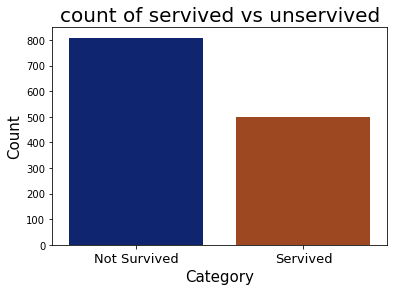

In [7]:
# count of servived vs unservived
label = ['Not Survived','Servived']
ax = sns.countplot(df['survived'],data=df,palette='dark')
plt.xlabel('Category' , fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('count of servived vs unservived',fontsize=20)
ax.set_xticklabels(label, rotation='horizontal', fontsize=13)
plt.show()

[Text(0, 0, 'Not Survived'), Text(1, 0, 'Servived')]

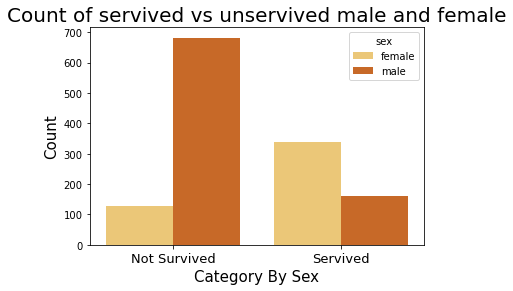

In [8]:
# Count of male and female passenger servived

ax = sns.countplot(df['survived'],data=df,hue=df['sex'],palette="YlOrBr")
plt.xlabel('Category By Sex' , fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of servived vs unservived male and female',fontsize=20)
ax.set_xticklabels(label, rotation='horizontal', fontsize=13)

In [9]:
# check for null value

df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

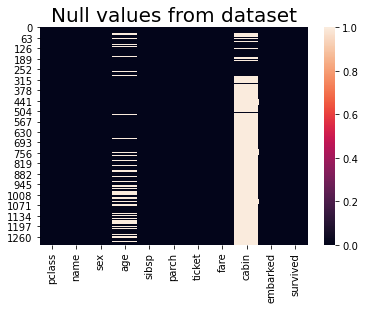

In [10]:
# we will see null values using heat map

sns.heatmap(df.isna())
plt.title("Null values from dataset",fontsize=20)
plt.show()

The age and cabin column contains so many null values 

In [11]:
# Fill null values of age column

df['age'] = df['age'].fillna(df['age'].mean())

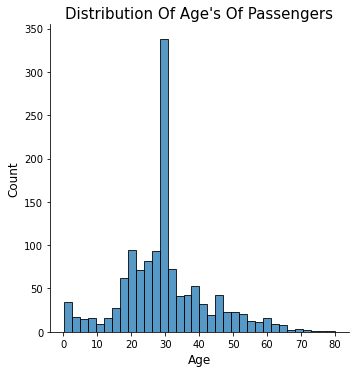

In [12]:
# See age distribution 

sns.displot(x='age', data=df)
plt.title("Distribution Of Age's Of Passengers",fontsize=15)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In [13]:
# drop null values of cabin column

df['cabin'] = df.drop(columns=['cabin'])

In [14]:
# drop null values of embarked column

df['embarked'] = df.drop(columns=['cabin'])

In [15]:
# drop null values of fare column

df['fare'] = df.drop(columns=['fare'])

In [16]:
# Check null values
df.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
survived    0
dtype: int64

In [17]:
# check for numeric and non-numeric values

numeric_feature = [feature for feature in df.columns if df[feature].dtypes !='O']
print("length of numeric variables : ",len(numeric_feature))
df[numeric_feature].head()


length of numeric variables :  5


,pclass,age,sibsp,parch,survived
0,1,29.0000,0,0,1
1,1,0.9167,1,2,1
2,1,2.0000,1,2,0
3,1,30.0000,1,2,0
4,1,25.0000,1,2,0


In [18]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("length of numeric variables : ",len(categorical_feature))
df[categorical_feature].head()

length of numeric variables :  6


,name,sex,ticket,fare,cabin,embarked
0,"Allen, Miss. Elisabeth Walton",female,24160,1,1,1
1,"Allison, Master. Hudson Trevor",male,113781,1,1,1
2,"Allison, Miss. Helen Loraine",female,113781,1,1,1
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,1,1,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,1,1,1


For prediction of servied and unservied passenger we do not need name,ticket,embarked so lets drop it.

In [19]:
df = df.drop(columns=['name','ticket','embarked','cabin','fare'])
df.head()

,pclass,sex,age,sibsp,parch,survived
0,1,female,29.0000,0,0,1
1,1,male,0.9167,1,2,1
2,1,female,2.0000,1,2,0
3,1,male,30.0000,1,2,0
4,1,female,25.0000,1,2,0


In [20]:
# convert sex column to numeric values

df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
df.head()

,pclass,sex,age,sibsp,parch,survived
0,1,0,29.0000,0,0,1
1,1,1,0.9167,1,2,1
2,1,0,2.0000,1,2,0
3,1,1,30.0000,1,2,0
4,1,0,25.0000,1,2,0


In [21]:
# sepearte independent and dependent variables

y = df.iloc[:,-1]
x = df.iloc[:,:-1]

# Modeling

In [22]:
# import train and test model to split data into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
x.describe()

,pclass,sex,age,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.498854,0.385027
std,0.837836,0.478997,12.883199,1.041658,0.865560
min,1.000000,0.000000,0.166700,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000
50%,3.000000,1.000000,29.881135,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000


In [24]:
# transform values

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.fit_transform(X_test)

# Train the model on the training dataset

In [25]:
# import model

from sklearn.linear_model import LogisticRegression 

In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

# Test the model on the testing dataset

In [28]:
model.score(X_test,y_test)

0.8206106870229007

# Predict from custom input data

In [29]:
x.head()

,pclass,sex,age,sibsp,parch
0,1,0,29.0000,0,0
1,1,1,0.9167,1,2
2,1,0,2.0000,1,2
3,1,1,30.0000,1,2
4,1,0,25.0000,1,2


In [30]:
data = pd.DataFrame({"pclass":[1], "sex":[1], "age":[25], "sibsp":[0],"parch":[2]})
data


,pclass,sex,age,sibsp,parch
0,1,1,25,0,2


In [31]:
data=minmaxscaler.transform(data)

In [32]:
print(model.predict(data))

[0]


# Got prediction as '0' i.e Not servived
    For this custom data the passenger is not servived